In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from src.utils import draw_graph
from graphs import example, simple_graph

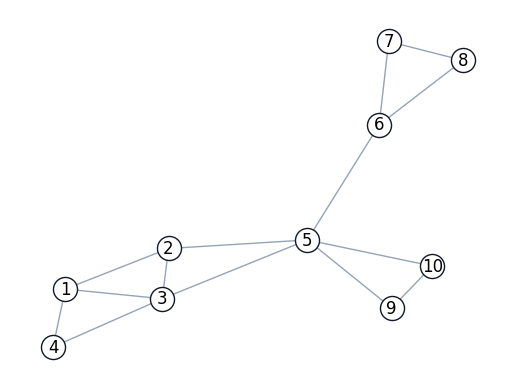

In [2]:
draw_graph(example)

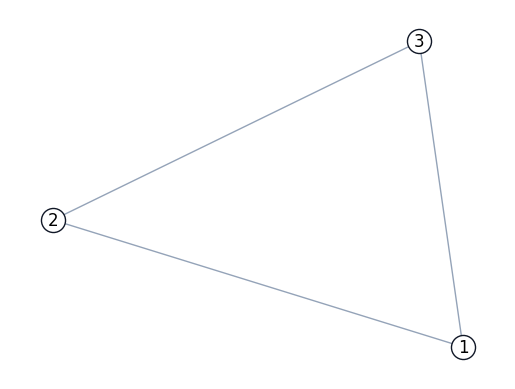

In [3]:
draw_graph(simple_graph)

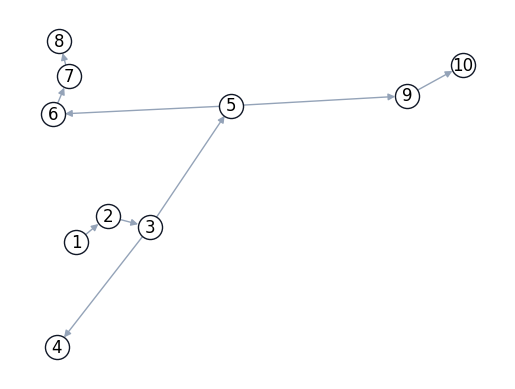

In [8]:
draw_graph(nx.dfs_tree(example))

# Expérimentations actuelles

In [5]:
# couleurs utilisées pour les parcours
BLANC = 0
GRIS = 1
NOIR = 2

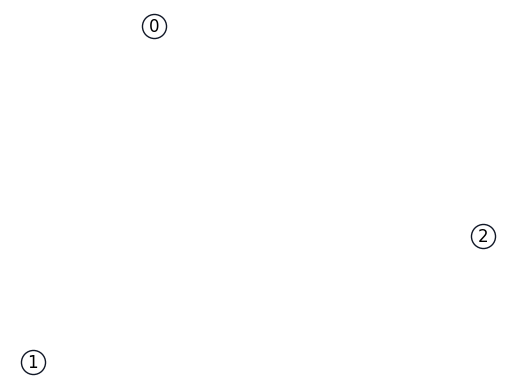

In [11]:
arbre_parcours = nx.DiGraph()
arbre_parcours.add_nodes_from(range(len(simple_graph)))

draw_graph(arbre_parcours)

In [7]:
for voisin in simple_graph.neighbors(1):
    print(voisin)

2
3


In [ ]:
def parcours(g: nx.Graph, noeud):
    """Parcours individuel de chaque noeud.


    -----
    noeud: noeud à parcourir"""

    couleur[noeud] = GRIS

    for voisin in g.neighbors(noeud):
        if couleur[voisin] == BLANC:  # arc avant
            arbre_parcours.add_edge([voisin, noeud], label="arbre")
            parcours(voisin)

        elif couleur[voisin] == GRIS:  # arc arrière
            if voisin not in arbre_parcours.neighbors(noeud):
                arbre_parcours.add_edge([voisin, noeud], label="arriere")

    couleur[noeud] = NOIR

In [24]:
def parcours_old(noeud, g: nx.Graph):
    couleur[noeud] = GRIS

    for voisin in g.neighbors(noeud):
        if couleur[voisin] == BLANC:  # arc avant
            arbre_parcours.add_edge([voisin, noeud], label="arbre")
            parcours(voisin)

        elif couleur[voisin] == GRIS:  # arc arrière
            if voisin not in arbre_parcours.neighbors(noeud):
                arbre_parcours.add_edge([voisin, noeud], label="arriere")

    couleur[noeud] = NOIR

In [25]:
couleur = [BLANC for _ in range(len(simple_graph))]

/tmp/ipykernel_102600/103872824.py:20: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edge_color=[edge_colors[G[u][v]["type"]] for u, v in G.edges()])


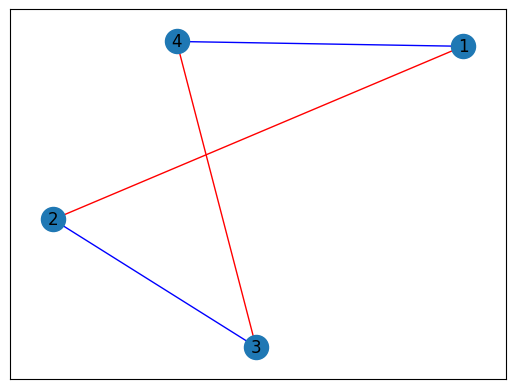

In [9]:
# Créez un graphe
G = nx.Graph()

# Ajoutez des sommets
G.add_nodes_from([1, 2, 3, 4])

# Ajoutez des arêtes avec des attributs "type"
G.add_edge(1, 2, type="A")
G.add_edge(2, 3, type="B")
G.add_edge(3, 4, type="A")
G.add_edge(4, 1, type="B")

# Créez un dictionnaire de couleurs pour les arêtes en fonction de l'attribut "type"
edge_colors = {"A": "red", "B": "blue"}

# Dessinez le graphe en spécifiant les couleurs des arêtes
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=[edge_colors[G[u][v]["type"]] for u, v in G.edges()])
plt.show()

# Todo after

In [ ]:
# plot trees in a better way:
# https://stackoverflow.com/questions/57512155/how-to-draw-a-tree-more-beautifully-in-networkx

In [130]:
g_chemin = Graph([[0, 1], [1, 2]])
g_chemin

g, g_ponts, c_2ac, sommet_art = parcours_graphe(g_chemin)
composantes_2_arete_connexes = Graph(g.edges())

for e in g_ponts.edges():
    composantes_2_arete_connexes.delete_edge(e)

for v in composantes_2_arete_connexes.vertices():
    if composantes_2_arete_connexes.degree(v) == 0:
        composantes_2_arete_connexes.delete_vertex(v)

print(sommet_art)

---------- DECOMPO EN CHAINES ----------
chaines : []
nb de cycles : 0
True
ordre DFI [0, 1, 2]
{0, 1, 2}


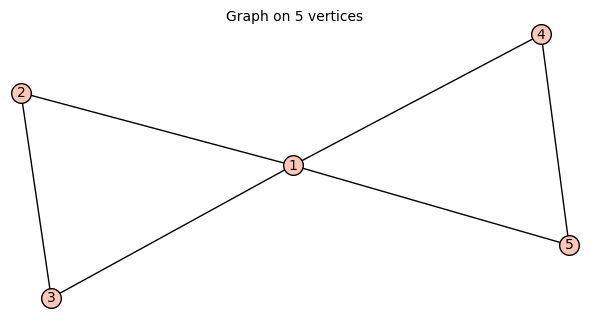

In [135]:
g2 = Graph()
g2.add_edges([(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (4, 5)])
g2

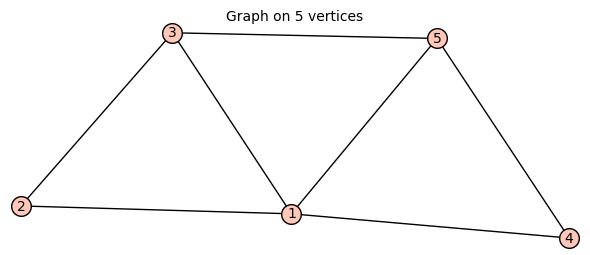

In [134]:
g2_bis = Graph(g2)
g2_bis.add_edge((3, 5))
g2_bis

In [137]:
b, b_ponts, c2ac, sommet_art = parcours_graphe(g2)
b2, b2_ponts, c2ac2, sommet_art2 = parcours_graphe(g2_bis)

---------- DECOMPO EN CHAINES ----------
	 3
debut 3

AJOUT debut fonction : [[1]]
	 2
debut 2

AJOUT debut fonction : [[1, 3]]
	 1

AJOUT voisin : [[1, 3, 2]]
fin 2
fin 3
	 5
debut 5

AJOUT debut fonction : [[1, 3, 2, 1], [1]]
	 4
debut 4

AJOUT debut fonction : [[1, 3, 2, 1], [1, 5]]
	 1

AJOUT voisin : [[1, 3, 2, 1], [1, 5, 4]]
fin 4
fin 5
chaines : [[1, 3, 2, 1], [1, 5, 4, 1]]
nb de cycles : 2
True
ordre DFI [1, 2, 3, 4, 5]
Le graphe est 2-arête-connexe
---------- DECOMPO EN CHAINES ----------
	 3
debut 3

AJOUT debut fonction : [[1]]
	 2
debut 2

AJOUT debut fonction : [[1, 3]]
	 1

AJOUT voisin : [[1, 3, 2]]
fin 2
fin 3
	 4
debut 4

AJOUT debut fonction : [[1, 3, 2, 1], [1]]
	 5
debut 5

AJOUT debut fonction : [[1, 3, 2, 1], [1, 4]]
	 3

AJOUT voisin : [[1, 3, 2, 1], [1, 4, 5]]
fin 5
fin 4
	 5
debut 5

AJOUT debut fonction : [[1, 3, 2, 1], [1, 4, 5, 3], [1]]
	 3

AJOUT voisin : [[1, 3, 2, 1], [1, 4, 5, 3], [1, 5]]
fin 5
chaines : [[1, 3, 2, 1], [1, 4, 5, 3], [1, 5, 3]]
nb de cycl

In [144]:
print(sommet_art)
print(sommet_art2)

{1}
set()


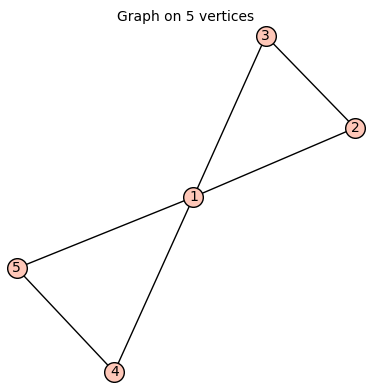

In [141]:
composantes_2_arete_connexes = Graph(g2.edges())

for e in b_ponts.edges():
    composantes_2_arete_connexes.delete_edge(e)
composantes_2_arete_connexes

In [139]:
plot_couleur(b)

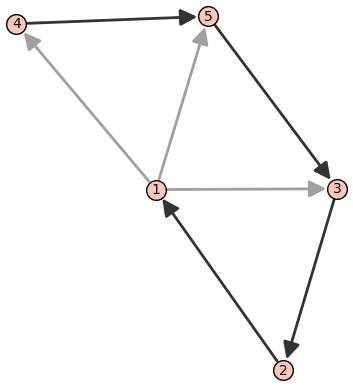

In [41]:
plot_couleur(b2)

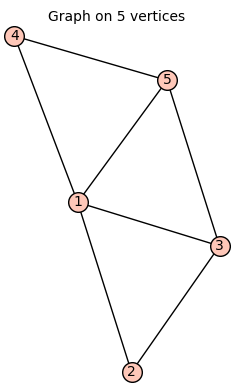

In [56]:
composantes_2_arete_connexes = Graph(b2.edges())

for e in b2_ponts.edges():
    composantes_2_arete_connexes.delete_edge(e)
composantes_2_arete_connexes

---------- DECOMPO EN CHAINES ----------
	 2
debut 2

AJOUT debut fonction : [[0]]
	 1
debut 1

AJOUT debut fonction : [[0, 2]]
	 0

AJOUT voisin : [[0, 2, 1]]
fin 1
fin 2
	 3
debut 3

AJOUT debut fonction : [[0, 2, 1, 0], [0]]
	 2

AJOUT voisin : [[0, 2, 1, 0], [0, 3]]
fin 3
	 4
debut 4

AJOUT debut fonction : [[0, 2, 1, 0], [0, 3, 2], [0]]
	 3

AJOUT voisin : [[0, 2, 1, 0], [0, 3, 2], [0, 4]]
fin 4
	 3
debut 3

AJOUT debut fonction : [[0, 2, 1, 0], [0, 3, 2], [0, 4, 3], [1]]
	 2

AJOUT voisin : [[0, 2, 1, 0], [0, 3, 2], [0, 4, 3], [1, 3]]
fin 3
	 4
debut 4

AJOUT debut fonction : [[0, 2, 1, 0], [0, 3, 2], [0, 4, 3], [1, 3, 2], [1]]
	 3

AJOUT voisin : [[0, 2, 1, 0], [0, 3, 2], [0, 4, 3], [1, 3, 2], [1, 4]]
fin 4
	 4
debut 4

AJOUT debut fonction : [[0, 2, 1, 0], [0, 3, 2], [0, 4, 3], [1, 3, 2], [1, 4, 3], [2]]
	 3

AJOUT voisin : [[0, 2, 1, 0], [0, 3, 2], [0, 4, 3], [1, 3, 2], [1, 4, 3], [2, 4]]
fin 4
chaines : [[0, 2, 1, 0], [0, 3, 2], [0, 4, 3], [1, 3, 2], [1, 4, 3], [2, 4, 3]]
nb 

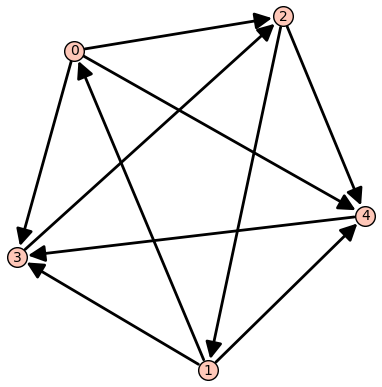

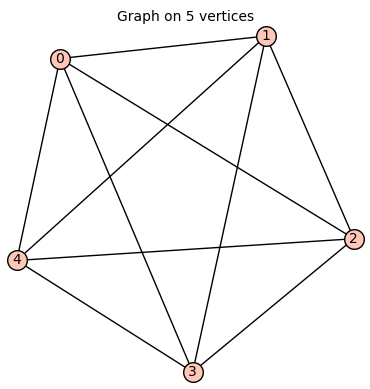

In [153]:
k4 = graphs.CompleteGraph(5)
k4, pont_k4, c2ac, sommet_art = parcours_graphe(k4)
plot_couleur(k4)

composantes_2_arete_connexes = Graph(k4.edges())

for e in pont_k4.edges():
    composantes_2_arete_connexes.delete_edge(e)
composantes_2_arete_connexes

In [154]:
sommet_art

set()

In [206]:
def parcours_graphe(g, ordre=None):
    """
    Cette fonction permet de parcourir un graphe.


    -----
    ordre (optionnel) : ordre de parcours des noeuds.
    """
    global nb_aretes_visitees, arriere, arbre_parcours_uniquement, deux_arete_connexe, deux_sommet_connexe

    g = DiGraph(g)  # on convertit les graphes non-orientés en orientés
    noeuds = g.vertices()

    couleur = {n: BLANC for n in noeuds}  # tous les noeuds sont blancs au début
    deja_vu = {n: False for n in noeuds}  # pour la décomposition en chaînes

    ordre_dfi = []  # DFI-order
    nb_aretes_visitees = 0  # pour la décomposition en chaînes

    chaines = []

    arbre_parcours = DiGraph()  # DFS-tree T (contient *aussi* les arc arrières !)
    arbre_parcours.add_vertices(noeuds)  # on met tous les noeuds de G dans T

    graphe_ponts = Graph(g.edges())  # liste des ponts

    deux_arete_connexe = False  # 2-arête-connexité du graphe
    deux_sommet_connexe = False  # 2(-sommet)-connexité du graphe

    def parcours(noeud, DEBUG=False):
        """Parcours individuel de chaque noeud."""

        if DEBUG:
            print("debut", noeud)
        couleur[noeud] = GRIS
        ordre_dfi.append(noeud)

        for voisin in g.neighbors_out(noeud):
            if DEBUG:
                print("\t", voisin)

            if couleur[voisin] == BLANC:  # arc avant
                arbre_parcours.add_edge([voisin, noeud], label="arbre")
                parcours(voisin)

            elif couleur[voisin] == GRIS:  # arc arrière
                if voisin not in arbre_parcours.neighbors_out(noeud):
                    arbre_parcours.add_edge([voisin, noeud], label="arriere")

        if DEBUG:
            print("fin", noeud)
        couleur[noeud] = NOIR

    def est_connexe():
        """
        Renvoie True si le graphe est connexe, False sinon.
        On vérifie qu'il ne reste aucun sommet blanc.
        """
        return not (BLANC in couleur.values())

    def lance_parcours():
        """
        Fonction qui lance le parcours en profondeur.
        """
        if ordre:  # si on a un ordre de parcours des noeuds
            for n in ordre:
                if couleur[n] == BLANC:
                    parcours(n)
        else:
            for n in noeuds:
                if couleur[n] == BLANC:
                    parcours(n)

    def parcours_decomposition_chaine(noeud, t=arbre_parcours, DEBUG=True):
        """
        Parcours individuel de chaque noeud,
        pour la décomposition en chaînes.
        Ici, on s'arrête dès qu'on rencontre un noeud déjà visité.
        """
        global nb_aretes_visitees

        if DEBUG:
            print("debut", noeud)
        deja_vu[noeud] = True

        if DEBUG:
            print(f"\nAJOUT debut fonction : {chaines}")
        chaines[-1].append(noeud)

        for voisin in t.neighbors_out(noeud):
            if DEBUG:
                print("\t", voisin)

            graphe_ponts.delete_edge((noeud, voisin))
            if deja_vu[voisin]:  # on s'arrête
                if DEBUG:
                    print(f"\nAJOUT voisin : {chaines}")
                chaines[-1].append(voisin)
                break
            else:
                nb_aretes_visitees += 1
                parcours_decomposition_chaine(voisin)

        if DEBUG:
            print("fin", noeud)

    def decomposition_en_chaines(graphe_arriere, t, ordre=ordre_dfi, DEBUG=True):
        """
        Fonction qui effectue la décomposition en chaîne,
        à partir de l'arbre de parcours.


        -----
        graphe_arriere: graphe des arc arrières

        t: arbre de parcours

        ordre: ordre des noeuds à parcourir (DFI index)
        """

        # ordre de parcours des noeuds
        for noeud in ordre:  # pour chaque noeud
            deja_vu[noeud] = True

            for voisin in graphe_arriere.neighbors_out(
                noeud
            ):  # pour chaque arc arrière
                if DEBUG:
                    print("\t", voisin)
                chaines.append([noeud])
                graphe_ponts.delete_edge((noeud, voisin))
                parcours_decomposition_chaine(voisin, t)

    def nombre_cycles(decomp_chaines):
        """
        Étant donné une décomposition en chaînes,
        renvoie le nombre de cycles qu'elle contient.

        Chaque chaîne est de la forme [v_1, v_2, ..., v_n].


        Une chaîne est un cycle si elle est de la forme :
        [v1, v2, ..., v_1]

        c'est-à-dire : v_n = v_1.


        -----
        decomp_chaines: une décomposition en chaînes
        """

        nb_cycles = 0

        for chaine in decomp_chaines:
            if chaine[0] == chaine[-1]:
                nb_cycles += 1

        return nb_cycles

    def calcule_comp_2_arete_connexe(ponts):
        """
        Renvoie les composantes 2-arêtes-connexes du graphe.

        On supprime les ponts du graphe original.
        Puis on supprime tous les sommets de degré 0 restant après ceci.

        -----
        ponts: liste des ponts du graphe
        """

        # On copie le graphe
        composantes_2_arete_connexe = Graph(g)

        # On en supprime tous les ponts
        for e in ponts:
            composantes_2_arete_connexe.delete_edge(e)

        # Maintenant que les ponts sont supprimés,
        # on enlève tout sommet de degré 0
        for v in composantes_2_arete_connexe.vertices():
            if composantes_2_arete_connexe.degree(v) == 0:
                composantes_2_arete_connexe.delete_vertex(v)

        return composantes_2_arete_connexe

    def trouve_sommets_articulation(ponts):
        """
        Cette fonction renvoie tous les sommets d'articulation
        du graphe.


        On utilise pour ceci le Lemme 5, qui dit
        qu'un sommet d'articulation est soit :

        - une des deux extremités d'un pont
        - le premier sommet d'un cycle différent de C_1


        On récupère donc tous les noeuds appartenant à un pont,
        puis tous les premiers sommets de chaque cycle,
        à partir du 2ème cycle de la décomposition en chaînes.


        -----
        ponts: liste des ponts du graphe
        """

        # on utilise un ensemble pour éviter les doublons
        sommets_articulation = set()

        # les ponts
        for u, v, _ in ponts:  # arête (u, v) et _ représente le label
            sommets_articulation.update([u, v])

        # premier sommet des cycles C_2, ..., C_k
        different_premier_cycle = False
        for chaine in chaines:
            if chaine[0] == chaine[-1]:  # si on a un cycle
                if different_premier_cycle:
                    sommets_articulation.add(chaine[0])
                else:
                    different_premier_cycle = True

        return sommets_articulation

    def calcule_comp_2_sommet_connexe(ponts):
        """
        Renvoie les composantes 2-sommet-connexes du graphe.


        * Pour chaque pont (u, v) :

        On supprime l'arête (u, v) du graphe.
        On rajoute un noeud u' (si déjà pris, u_2, sinon u_3, etc)
            et de même un noeud v'.
        On rajoute une arête (u', v') dans le graphe.


        * Pour chaque sommet u en début de cycle, à partir de C_2 :

        Le cycle est de la forme : u, v_1, ..., v_k, u

        Dans ce cas :

        On supprime les arêtes (u, v_1) et (u, v_k) du graphe.
        On rajoute un noeud u' (si déjà pris, u_2, sinon u_3, etc).
        On rajoute deux arêts (u', v_1) et (u', v_k) dans le graphe.

        SAUF :
        Si le sommet est de degré 2 (c'est-à-dire que ses autres
        arêtes ont été supprimées entre temps).
        Dans ce cas, on ne fait rien.


        -----
        ponts: liste des ponts du graphe
        """

        # Pour éviter de traiter plusieurs fois les sommets d'articulation:
        deja_vu = {i: False for i in a}

        # On copie le graphe
        composantes_2_sommet_connexe = Graph(g)

        # les ponts
        for i in range(len(ponts)):
            u, v, _ = ponts[i]  # arête (u, v) et _ représente le label

            composantes_2_sommet_connexe.delete_edge((u, v))

            # on rajoute un indice qui correspond
            # au numéro du pont préfixé par la lettre 'p'
            # ceci est arbitraire et sert juste à différencier
            # les noeuds.
            nouveau_u = f"{str(u)}_p{i}"
            nouveau_v = f"{str(v)}_p{i}"

            composantes_2_sommet_connexe.add_vertex(nouveau_u)
            composantes_2_sommet_connexe.add_vertex(nouveau_v)

            nouvelle_arete = (nouveau_u, nouveau_v)

            composantes_2_sommet_connexe.add_edge(nouvelle_arete)

        # premier sommet des cycles C_2, ..., C_k
        different_premier_cycle = False
        for i in range(len(chaines)):
            chaine = chaines[i]

            if chaine[0] == chaine[-1]:  # si on a un cycle
                if different_premier_cycle:
                    noeud = chaine[0]

                    # Si le sommet est de degré 2, on n'a aucun intérêt
                    # à le cloner. On passe la procédure.
                    if composantes_2_sommet_connexe.degree(noeud) == 2:
                        continue  # itération suivante de la boucle for

                    voisin1 = chaine[1]  # deuxième
                    voisin2 = chaine[-2]  # avant-dernier

                    composantes_2_sommet_connexe.delete_edge((noeud, voisin1))
                    composantes_2_sommet_connexe.delete_edge((noeud, voisin2))

                    # on rajoute un indice qui correspond
                    # au numéro de la chaîne préfixé par la lettre 'c'
                    # ceci est arbitraire et sert juste à différencier
                    # les noeuds.
                    nouveau_noeud = f"{str(noeud)}_c{i}"

                    composantes_2_sommet_connexe.add_vertex(nouveau_noeud)

                    arete1 = (nouveau_noeud, voisin1)
                    arete2 = (nouveau_noeud, voisin2)

                    composantes_2_sommet_connexe.add_edges([arete1, arete2])
                else:
                    different_premier_cycle = True

        return composantes_2_sommet_connexe

    def deux_connexite():
        """
        Met à jour la 2-arête-connexité et 2-sommet-connexité du graphe.
        """
        global deux_arete_connexe, deux_sommet_connexe

        nb_cycles = nombre_cycles(chaines)
        nb_ponts = len(graphe_ponts.edges())

        if nb_ponts > 0:  # il y a des ponts
            pass  # aucun des deux
        elif nb_cycles > 1:  # il y a un cycle différent de C_1
            deux_arete_connexe = True
        else:
            deux_arete_connexe = True
            deux_sommet_connexe = True

    # code
    lance_parcours()
    print("---------- DECOMPO EN CHAINES ----------")
    # on sépare le graphe en 2 parties pour plus de commodité
    arcs_arrieres = list(filter(lambda e: e[2] == "arriere", arbre_parcours.edges()))
    arcs_parcours = list(filter(lambda e: e[2] == "arbre", arbre_parcours.edges()))

    arbre_parcours_uniquement = DiGraph([g.vertices(), arcs_parcours])
    arriere = DiGraph([g.vertices(), arcs_arrieres])

    decomposition_en_chaines(graphe_arriere=arriere, t=arbre_parcours_uniquement)

    ponts = graphe_ponts.edges()

    print(f"chaines : {chaines}")

    print(f"nb de cycles : {nombre_cycles(chaines)}")

    print(est_connexe())
    print(f"ordre DFI {ordre_dfi}")

    deux_connexite()
    if deux_arete_connexe:
        print("Le graphe est 2-arête-connexe")
    if deux_sommet_connexe:
        print("Le graphe est 2-sommet-connexe")

    composantes_2_arete_connexe = calcule_comp_2_arete_connexe(ponts)

    sommets_art = trouve_sommets_articulation(ponts)

    comp_2_sommet_connexe = calcule_comp_2_sommet_connexe(ponts)

    return (
        arbre_parcours,
        graphe_ponts,
        composantes_2_arete_connexe,
        sommets_art,
        comp_2_sommet_connexe,
    )

In [207]:
a, graphe_ponts, comp_2ac, sommet_art, comp_2sc = parcours_graphe(exemple)

---------- DECOMPO EN CHAINES ----------
	 3
debut 3

AJOUT debut fonction : [[1]]
	 2
debut 2

AJOUT debut fonction : [[1, 3]]
	 1

AJOUT voisin : [[1, 3, 2]]
fin 2
fin 3
	 4
debut 4

AJOUT debut fonction : [[1, 3, 2, 1], [1]]
	 3

AJOUT voisin : [[1, 3, 2, 1], [1, 4]]
fin 4
	 5
debut 5

AJOUT debut fonction : [[1, 3, 2, 1], [1, 4, 3], [2]]
	 3

AJOUT voisin : [[1, 3, 2, 1], [1, 4, 3], [2, 5]]
fin 5
	 10
debut 10

AJOUT debut fonction : [[1, 3, 2, 1], [1, 4, 3], [2, 5, 3], [5]]
	 9
debut 9

AJOUT debut fonction : [[1, 3, 2, 1], [1, 4, 3], [2, 5, 3], [5, 10]]
	 5

AJOUT voisin : [[1, 3, 2, 1], [1, 4, 3], [2, 5, 3], [5, 10, 9]]
fin 9
fin 10
	 7
debut 7

AJOUT debut fonction : [[1, 3, 2, 1], [1, 4, 3], [2, 5, 3], [5, 10, 9, 5], [6]]
	 8
debut 8

AJOUT debut fonction : [[1, 3, 2, 1], [1, 4, 3], [2, 5, 3], [5, 10, 9, 5], [6, 7]]
	 6

AJOUT voisin : [[1, 3, 2, 1], [1, 4, 3], [2, 5, 3], [5, 10, 9, 5], [6, 7, 8]]
fin 8
fin 7
chaines : [[1, 3, 2, 1], [1, 4, 3], [2, 5, 3], [5, 10, 9, 5], [6, 7,

{5: [(0.635011732479007, 0.880528950807483, 0.975272734509674), 5, '5_p0', '5_c3'], 6: [(0.902313813943997, 0.684098509586391, 0.712135757726338), 6, '6_p0']}


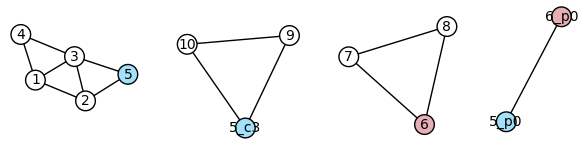

In [229]:
comp_2sc

# pour colorier de la même couleur les sommets d'articulation
# qui ont été séparés
# on les repère par leur préfixe
import random  # pour les couleurs aléatoires
import re  # pour les regex


from functions import couleur_aleatoire


# le nom du noeud suivi d'un '_' (début de la chaîne, pas besoin du reste)
pattern = re.compile("(?P<nom_noeud>(.)+)_")

# sommets d'articulation séparés
# exemple : {'5': ['couleur_aleatoire', '5', '5_c1', '5_p3']}
# on a la couleur du noeud au début
# et ensuite les noeuds du groupe

sommets_equivalents = dict()

# la couleur de chaque sommet d'articulation divisé
couleurs_sommet = dict()

for v in comp_2sc:
    p = pattern.match(str(v))

    if p:  # si on a trouvé un préfixe correspondant à la regex
        nom_noeud = p.group("nom_noeud")

        try:  # on tente de convertir en entier si possible
            nom_noeud = int(nom_noeud)  # '5' -> 5
        except:
            pass

        if nom_noeud in sommets_equivalents.keys():
            sommets_equivalents[nom_noeud].append(v)
        else:  # nouveau groupe de noeuds séparés
            sommets_equivalents[nom_noeud] = [couleur_aleatoire(), nom_noeud, v]

for _, tab in sommets_equivalents.items():
    couleur = tab[0]
    s = tab[1:]
    couleurs_sommet[couleur] = s

print(sommets_equivalents)


options = {
    "edge_colors": comp_2sc._color_by_label(options_couleurs),
    "vertex_colors": couleurs_sommet,
    "vertex_color": "#fff",  # couleur par défaut
}

comp_2sc.plot(**options)

In [201]:
sommet_art == comp_2sc

True

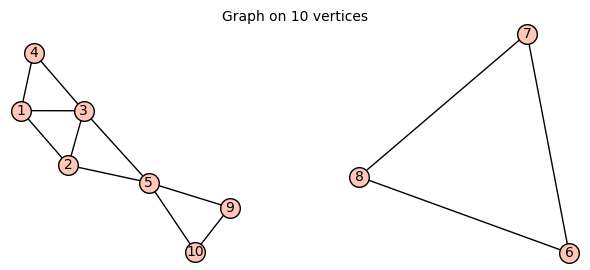

In [31]:
composantes_2_arete_connexes = Graph(exemple.edges())

for e in graphe_ponts.edges():
    composantes_2_arete_connexes.delete_edge(e)
composantes_2_arete_connexes

In [75]:
arcs_arrieres = list(filter(lambda e: e[2] == "arriere", a.edges()))

In [76]:
arcs_parcours = list(filter(lambda e: e[2] == "arbre", a.edges()))

In [12]:
arcs_arrieres = list(filter(lambda e: e[2] == "arriere", a.edges()))
arcs_parcours = list(filter(lambda e: e[2] == "arbre", a.edges()))

arbre_parcours_uniquement = DiGraph([exemple.vertices(), arcs_parcours])
arriere = DiGraph([exemple.vertices(), arcs_arrieres])

plot_couleur(arbre_parcours_uniquement)
plot_couleur(arriere)

NameError: name 'a' is not defined

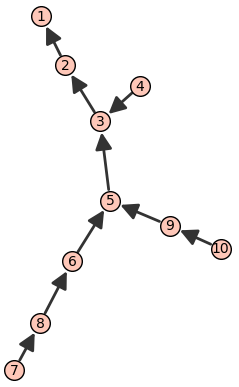

In [85]:
plot_couleur(arbre_parcours_uniquement)

plot_couleur(a)

In [31]:
# a = parcours_graphe(g)
ordre = [4, 3, 2, 1, 9, 8, 7, 6, 5, 0, 28, 25]

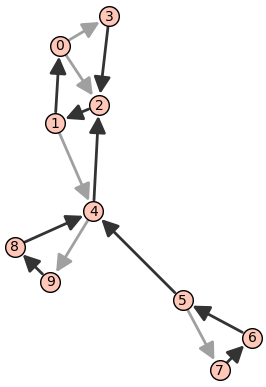

In [240]:
plot_couleur(a)

debut 0
	 1
debut 1
	 0
	 2
debut 2
	 0
	 1
	 3
debut 3
	 0
	 1
	 2
fin 3
fin 2
	 3
fin 1
	 2
	 3
fin 0
True


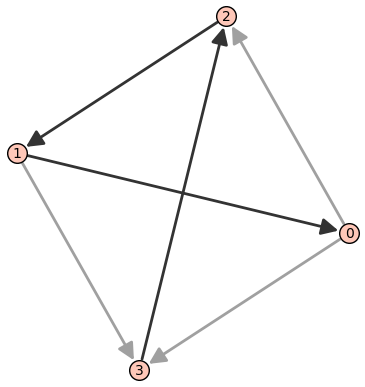

In [151]:
b = parcours_graphe(graphs.CompleteGraph(4))
plot_couleur(b)

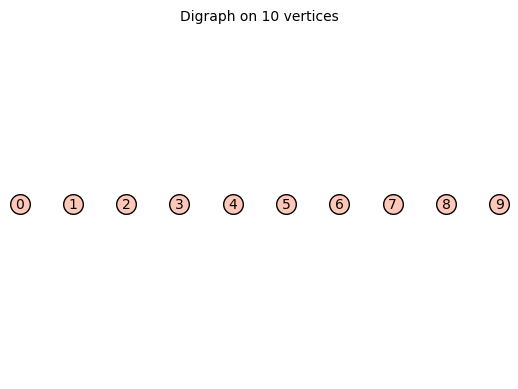

In [49]:
e = DiGraph()
e.add_vertices(g.vertices())
e

In [44]:
type(g.vertices())

<class 'list'>

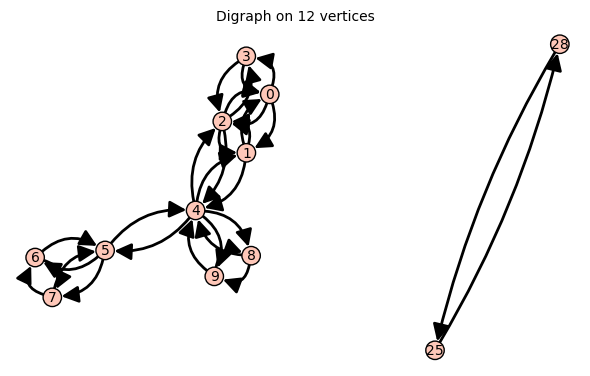

In [165]:
g = DiGraph(g)
g

In [40]:
len(g)

10

In [162]:
g.add_edge([25, 28])

In [154]:
g.add_vertex(25)

In [147]:
# pour décomposition en chaînes :
STOP = "STOP"

options_couleurs = {  # pour l'AFFICHAGE du graphe
    "arbre": "#333",  # couleur des arcs de l'arbre de parcours
    "arriere": "#a0a0a0",  # couleur des arcs arrières
}

# a.plot(edge_colors=a._color_by_label(options_couleurs))


def plot_couleur(arbre, sommets_articulation=[]):
    """
    Affichage en couleur

    #todo
    """
    vertex_colors = {"#2f80ed": sommets_articulation}
    arbre.plot(edge_colors=arbre._color_by_label(options_couleurs))


ordre = [4, 3, 2, 1, 9, 8, 7, 6, 5, 0]

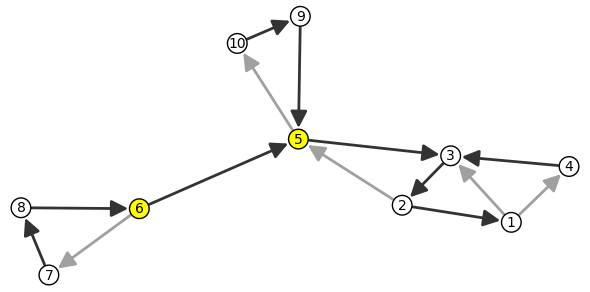

In [99]:
vertex_colors = {"yellow": [5, 6]}

options = {
    "edge_colors": a._color_by_label(options_couleurs),
    "vertex_colors": vertex_colors,
    "vertex_color": "#fff",  # couleur par défaut
}

a.plot(**options)

In [89]:
z = Graph()
z.add_edges([("a", "b")])

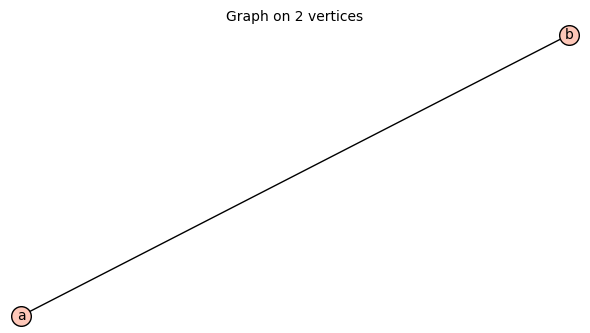

In [91]:
z